# TASK 2

In [6]:
# Logic Operator
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Sigmoid function
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


# Derivative of Sigmoid function for backprop
def sigmoid_derivative(x):
    return x * (1.0 - x)

In [8]:
# Define the neural network
class NeuralNetwork:
    def __init__(self, x, y, n):
        self.input = x
        self.neuron = n
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron)  # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1)  # N neurons connected to output
        self.y = y
        self.output = np.zeros(self.y.shape)  # instantiating the output

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        # Weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2

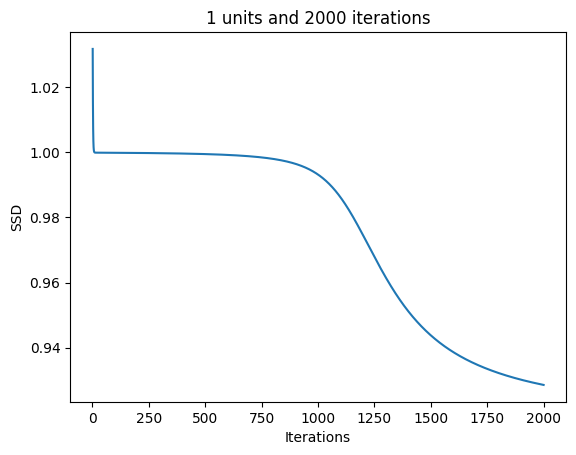

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.50649589]
 [0.65322936]
 [0.65322585]
 [0.65692395]]
The lowest SSD is: 0.928589350221086
------------------


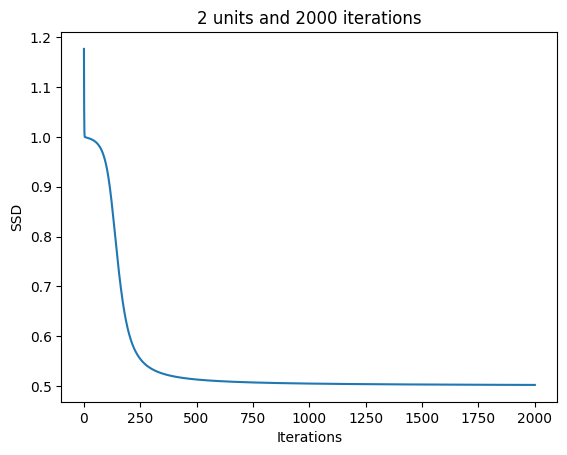

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.01817238]
 [0.98118515]
 [0.49941927]
 [0.50076123]]
The lowest SSD is: 0.5020271116772129
------------------


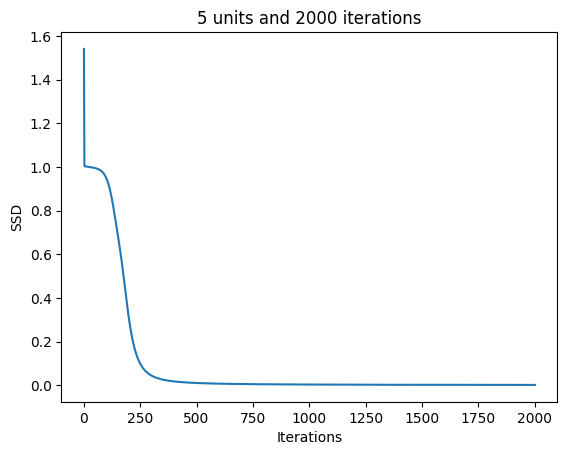

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.01110064]
 [0.98449162]
 [0.98131498]
 [0.01905658]]
The lowest SSD is: 0.0010760176181595122
------------------


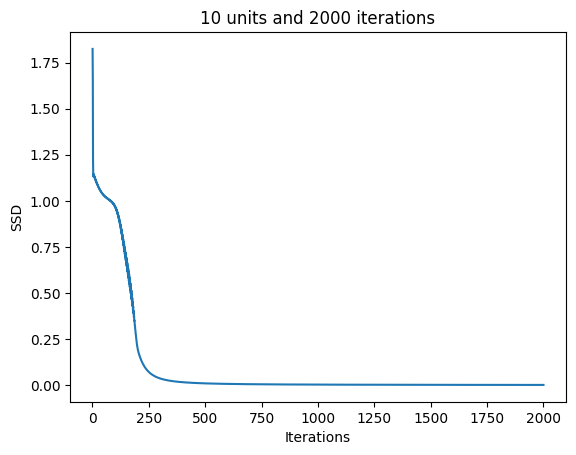

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.01181705]
 [0.98404786]
 [0.9829141 ]
 [0.01844985]]
The lowest SSD is: 0.0010264379635260236
------------------


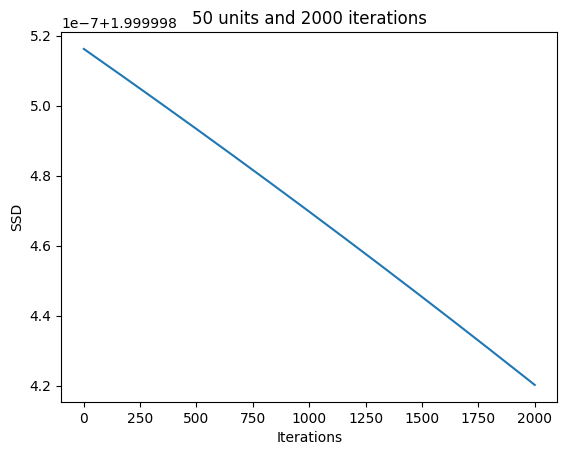

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.99999922]
 [0.99999994]
 [0.99999994]
 [0.99999999]]
The lowest SSD is: 1.9999984202298955
------------------


In [9]:
Input = np.array([[0, 0, 1],
                    [0, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]])
Target = np.array([[0], [1], [1], [0]])

iterations = [2000, 2000, 2000, 2000, 2000]
units = [1, 2, 5, 10, 50]

for n_unit, n_iteration in zip(units, iterations):    
    model = NeuralNetwork(Input, Target, n_unit)
    SSD = []
    for i in range(n_iteration):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output) ** 2
        SSD.append(np.sum(errors))  # Objective(loss) function
    Itr = np.linspace(1, len(SSD), len(SSD))
    plt.plot(Itr, SSD)
    plt.title(f"{n_unit} units and {n_iteration} iterations")
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    plt.show()

    # Print the results
    print("The target values are:", Target)
    print("The predicted values are:", model.output)
    print("The lowest SSD is:", min(SSD))    
    print("------------------")